<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [4]:
# Check for GPU
!nvidia-smi

Sat May 25 15:07:12 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 552.22                 Driver Version: 552.22         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3070 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   42C    P8             12W /   55W |       0MiB /   8192MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [6]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision 
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.3.0


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

Currently, computer vision is used in many areas in industry, eg: 
- medicine: navigation of medical tools;
- automotive: support for drivers: recognition of others cars, pedestrians etc;
- fitness and sports: self-tracking system helping to exercise correctly
- education, ecommerce, agriculture etc.

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

Overfitting is a phenomenon in machine learning, when the model is too fitted to training data, and it loses the ability to generalize (= achieving satisfying results on testing data).

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

There are many possible ways of preventing overfitting in machine learning. The most common are:
- use more training data - when a model is trained on a larger dataset, it can learn a broader range of patterns, making it less likely to memorize the noise or specific quirks of a smaller dataset
- use regularizations - regularization techniques add a penalty to the loss function used to train the model, discouraging overly complex models that may overfit the training data. The most common regularizations are: L1, L2 and Dropout layern. 
- use less complex model (= simplify it) - simplifying the model involves reducing the number of parameters or features. This can be achieved by: reducing the number of features (like hidden neurons) or chosing a simpler model architecture. Simpler models are less likely to capture noise and overfit, as they have a lower capacity to model complex patterns in the data.
- use data augmentation - data augmentation involves artificially increasing the size of the training dataset by creating modified versions of existing data points. This is especially common in image processing, where techniques such as rotation, scaling, flipping, and cropping are used to create new training samples. 
- use early stopping - it pauses the training phase before the machine learning model learns the noise in the data

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

Here are a few reasons why the later layers in a CNN see more of the image than the earlier layers:
- Hierarchical feature learning: CNNs are designed to learn hierarchical representations of features in an image. The early layers of a CNN learn low-level features such as edges and textures, while the deeper layers learn high-level features such as shapes and objects. By gradually increasing the receptive field of the neurons in the network, the later layers can capture more global information and context about the image, which is essential for making accurate predictions.
- Spatial hierarchy: In an image, local features (such as edges and corners) are combined to form more complex patterns and objects at higher levels of abstraction. By increasing the receptive field of the neurons in the later layers, the network can capture these spatial hierarchies and relationships between different parts of the image, leading to better representation learning.
- Downsampling: Pooling layers are often used in CNNs to downsample the feature maps and reduce the spatial dimensions while retaining important features. As the network progresses through the layers, the spatial dimensions of the feature maps decrease due to the pooling operations, allowing the later layers to have a broader view of the input image.
- Translation invariance: By allowing the later layers to have a larger receptive field, the network can achieve translation invariance, which means that the network's predictions are not sensitive to small translations in the input image. This property is crucial for tasks such as object recognition, where the position of an object in the image should not affect the network's ability to recognize it.

In summary, the design of CNNs with increasing receptive fields in the later layers helps the network learn hierarchical representations of features, capture spatial hierarchies in the input image, downsample the feature maps for efficiency, and achieve translation invariance, all of which contribute to the network's ability to effectively learn and recognize patterns in images.

Source: https://www.quora.com/In-a-CNN-why-do-the-later-layers-see-more-of-the-image-than-the-earlier-layers-Shouldnt-it-be-the-other-way-around

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [7]:
# Setup training data
train_data = datasets.MNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.MNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:04<00:00, 2338311.09it/s]


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 143466.72it/s]


Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:03<00:00, 445715.46it/s]


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4456264.04it/s]


Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



In [8]:
print(len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets))

class_names = train_data.classes
print(class_names)

60000 60000 10000 10000
['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


## 6. Visualize at least 5 different samples of the MNIST training dataset.

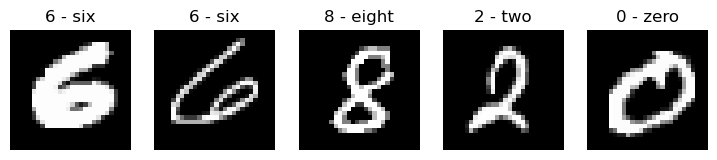

In [9]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 1, 5
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?